In [1]:
# Load numpy
import numpy as np
# Load matplotlib for plotting
import matplotlib.pyplot as plt
# Load everything from "ComplexRemez"
from ComCheb import Remez,mpRemez,Contours,mpRoots,Cheby,Roots

# Load mpmath and enable pretty printing!
from mpmath import mp
mp.pretty =1

# Contours
The following contours implemented:
  - Regular Polygons
  - Hypercloids
  - Circular Lunes
  - Lemniscates         
  
All of these contours are available in numpy and mpmath. The corresponding routines take parameters to determine the order or structure of the wanted contour, and return an executable function representing the wanted contour.

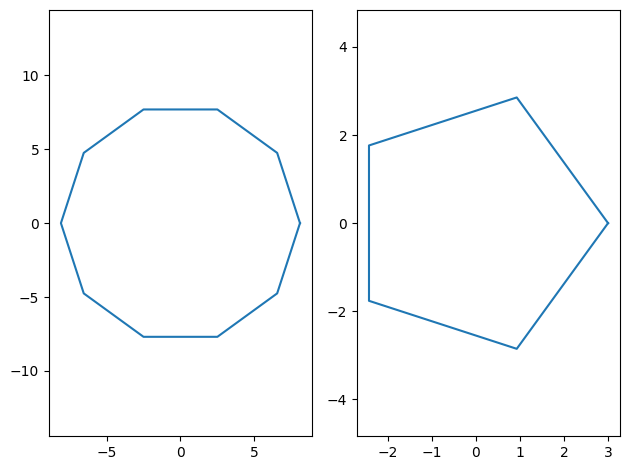

In [2]:
# define 10-polygon with sidelength 5
gamma1 = Contours.Polygon(10,sl=5)
# define 5-polygon with radius 3
gamma2 = Contours.Polygon(5,rad=3)

x = np.linspace(0,1,1001)
plt.subplot(121)
tmp = gamma1(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(122)
tmp = gamma2(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.tight_layout()

The same way we can work with the mpmath routines. Let us compare the numpy and mpmath implementation for different working precisions.

In [3]:
# Define numpy and mpmath contours
gamma   = Contours.Polygon(10,sl=10)
mpgamma = Contours.mpPolygon(10,sl=10)

x = np.linspace(0,1,1001)

# Set working precision and compute maximum difference
mp.dps = 15
print(max(abs(gamma(x)-mpgamma(x))))
mp.dps = 20
print(max(abs(gamma(x)-mpgamma(x))))
mp.dps = 25
print(max(abs(gamma(x)-mpgamma(x))))


0.0
1.0121011085822018309e-14
1.012100680272009909710298e-14


And as an overview, we can now see all implemented contours.

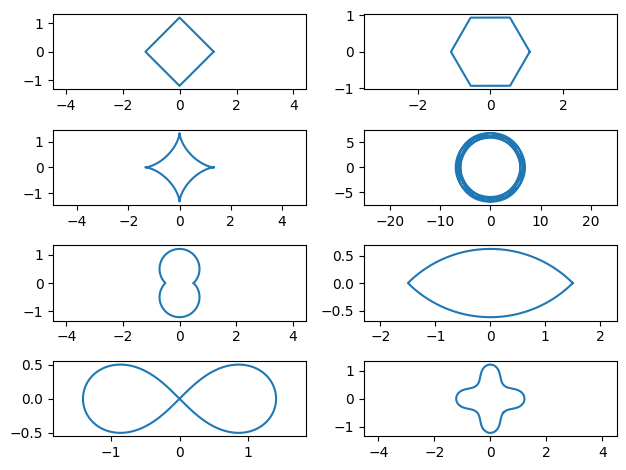

In [4]:
# Polygons, normalized with capacity 1
def poly_cap(m,sl=1):   # mpmath implementation of capacity of polygons
    m = mp.mpf(m)
    return mp.gamma(1/m)/(2**(1+2/m)*mp.pi**0.5*mp.gamma(1/2+1/m))

gamma1 = Contours.Polygon(4,sl=1/float(poly_cap(4)))
gamma2 = Contours.Polygon(6,sl=1/float(poly_cap(6)))

# Hypercloids
gamma3 = Contours.Hypocycloid(4)        # order 4
gamma4 = Contours.Hypocycloid(6,0.5)    # order 6 and scaled by 1/2

# Circular Lunes
gamma5 = Contours.CircLune(1/2)
gamma6 = Contours.CircLune(3/2)

# Lemniscates
gamma7 = Contours.Lemniscate(2,1)        # Bernoulli
gamma8 = Contours.Lemniscate(4,1.05)     # Some other Lemniscate

x = np.linspace(0,1,10001)
plt.subplot(421)
tmp = gamma1(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(422)
tmp = gamma2(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(423)
tmp = gamma3(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(424)
tmp = gamma4(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(425)
tmp = gamma5(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(426)
tmp = gamma6(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(427)
tmp = gamma7(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.subplot(428)
tmp = gamma8(x)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.tight_layout()

# Remez
## Numpy implementation

In [5]:
# If something is not clear. Call: 
help(Remez)

Help on function Remez in module ComCheb.Remez:

Remez(gamma, N, t=None, a=None, symmetry=1, rc=False, prec=1e-10, maxit=100, plot=False, pinfo=False)
    Performs Tangs algorithm for the given contour.
    Input:
    ------
        gamma    : function; it describes the wanted contour, it has to be able to handle numpy arrays.
        N        : integer; sets the order of the wanted Cheybshev polynomial.

    Optional:
    ---------
        t        : 1D numpy array; sets initial reference for the Remez routine. If None, then t is
                   choosen equidistantly.
        a        : 1D numpy array; sets the inital angles for the Renez routine. If None, then a is
                   choosen randomly.
        symmetry : integer; describes the symmetry factor. (n-regular polygon has symm. factor of n)
        rc       : bool; (default False) enable this setting if the coefficients are real. (speed up)
        prec     : float; wanted threshold for tangs algorithm.
        maxit    

Iteration	 h_p			 h_D			 relative error
1		 5.33300095e-01		 1.73179177e-01		 2.07947009e+00
2		 6.06835042e-01		 2.58205801e-01		 1.35019910e+00
3		 2.81393794e-01		 2.65193627e-01		 6.10880683e-02
4		 2.76129380e-01		 2.71983470e-01		 1.52432416e-02
5		 2.73014620e-01		 2.72611213e-01		 1.47978866e-03
6		 2.72945203e-01		 2.72710745e-01		 8.59730121e-04
7		 2.72782884e-01		 2.72750817e-01		 1.17567886e-04
8		 2.72767487e-01		 2.72758518e-01		 3.28840335e-05
9		 2.72762846e-01		 2.72761198e-01		 6.04348546e-06
10		 2.72762259e-01		 2.72761537e-01		 2.64794482e-06
11		 2.72761805e-01		 2.72761709e-01		 3.51508530e-07
12		 2.72761776e-01		 2.72761727e-01		 1.80128728e-07
13		 2.72761744e-01		 2.72761736e-01		 2.83544513e-08
14		 2.72761740e-01		 2.72761738e-01		 8.03898797e-09
15		 2.72761739e-01		 2.72761739e-01		 1.53304089e-09
16		 2.72761739e-01		 2.72761739e-01		 6.21498285e-10
17		 2.72761739e-01		 2.72761739e-01		 7.05609475e-11




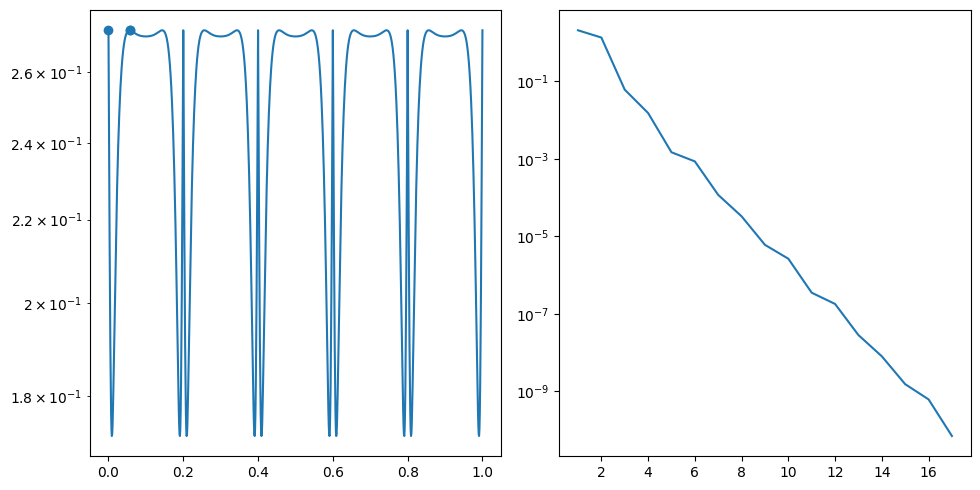

In [6]:
# Set order of polygon m and define  contour
m = 5
gamma = Contours.Polygon(m)

# Compute Chebyshev approximation of degree N
N = 12
np.random.seed(1001)
t,a,L,h,rel_err = Remez(gamma,N,symmetry=m,rc=1,pinfo=1, plot=1)

## Mpmath Implementation

In [7]:
#If something is not clear
help(mpRemez)

Help on function mpRemez in module ComCheb.mpRemez:

mpRemez(gamma, N, t=None, a=None, symmetry=1, rc=False, prec=1e-10, maxit=100, samples=1001, reps=10, plot=False, pinfo=False)
    Performs Tangs algorithm for the given contour.
    Input:
    ------
        gamma    : function; it describes the wanted contour, it has to be able to handle numpy arrays.
        N        : integer; sets the order of the wanted Cheybshev polynomial.

    Optional:
    ---------
        t        : 1D numpy array; sets initial reference for the Remez routine. If None, then t is
                   choosen equidistantly.
        a        : 1D numpy array; sets the inital angles for the Renez routine. If None, then a is
                   choosen randomly.
        symmetry : integer; describes the symmetry factor. (n-regular polygon has symm. factor of n)
        rc       : bool; (default False) enable this setting if the coefficients are real. (speed up)
        prec     : float; wanted threshold for tangs

In [8]:
# Let us go crazy with mpmath.
# Assume, that we want to compute Tang's algorithm with a relative error of 1e-20

# Set order of polygon m and define  contour
m = 5
mpgamma = Contours.mpPolygon(m)

# Compute Chebyshev approximation of degree N
mp.dps=30
N = 10
mpt,mpa,mpL,mph,mprel_err = mpRemez(mpgamma,N,symmetry=m,prec=1e-20,reps=20,rc=0)

Now out of interrest, let us compare the numpy results with the mp math results.

In [9]:
print('Differnce for coefficient vector :\t',float(max(abs(L -mpL))))
print('Differnce for Uniform error      :\t',float(abs(h -mph)))

Differnce for coefficient vector :	 0.11250302889620571
Differnce for Uniform error      :	 0.07889277977720711


# Roots
This routine works for both numpy and mpmath imputs, as long as they are given as in the outputs of Remez or mpRemez.

In [10]:
m = 5
N = 10
mp.dps=30

gamma = Contours.mpPolygon(m)
_,_,L,_,_ = mpRemez(gamma,N,symmetry=m,prec=1e-20,reps=20,plot=False)

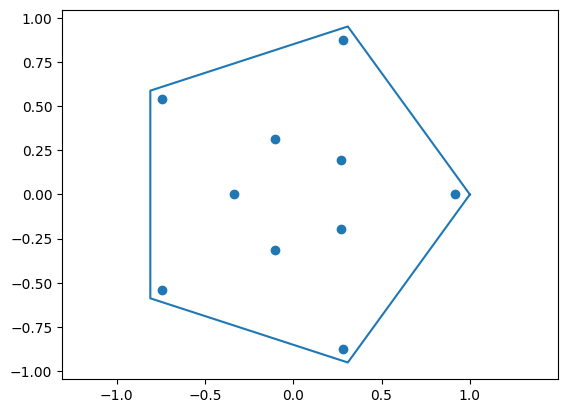

In [11]:
e = Roots(L,N,symmetry=m)
plt.scatter(e.astype(complex).real,e.astype(complex).imag)

x = np.linspace(0,1,1001)
tmp = gamma(x).astype(complex)
plt.plot(tmp.real,tmp.imag)
plt.axis('equal')
plt.show()

I assume that these roots are accurate up to 11 digits, roughtly. I do so, as if we compute the angles of the roots and keep in mind that they have to be multiples of $\frac{2\pi} m$, then we see that the deviate of these correct angle rougly about 1e-11.

In [12]:
e1 = e.astype(complex)
e1 = np.angle(e1)/np.pi*m
e1 - np.round(e1)

array([-1.92426408e-10, -4.66145146e-12, -1.92426075e-10, -4.66116035e-12,
       -1.92426519e-10, -4.66116035e-12, -1.92426519e-10, -4.66116035e-12,
       -1.92426519e-10, -4.66160444e-12])

# Cheby
Finally, here is how to evaluate the corresponding Chebyshev polynomials. Things work similarly with the mpRemez.

In [13]:
# First compute Remez
m = 5
gamma = Contours.Polygon(m)

# Compute Chebyshev approximation of degree N
N = 10
t,_,L,h,_ = Remez(gamma,N,symmetry=m,plot=0,pinfo=0)
print('Chebyshev error :\t',h)

Chebyshev error :	 0.3516545187438974


We can directly use the "Cheby" function. Here we have the option to pass the contour $\gamma$, so that we compute $T_N\circ\gamma$, as in the first example. Or we can only compute $T_N$, as in the second example.

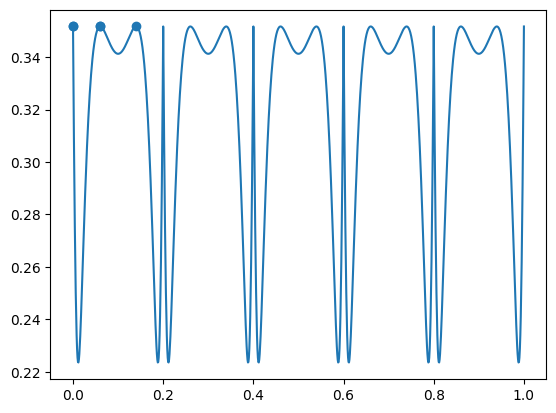

In [14]:
# First example
x = np.linspace(0,1,1001)
f1 = Cheby(N,L,symmetry=m,gamma=gamma)
plt.plot(x,abs(f1(x)))
plt.scatter(t,abs(f1(t)))
plt.show()

In [15]:
# Second example
f2 = Cheby(N,L,symmetry=m)
f2(1+1j)

np.complex128(2.580159394604088+34.58279020581741j)

We can also compare both and observe:

In [16]:
t = np.linspace(0,1,21)
f1(t)-f2(gamma(t))

array([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
       0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j])